In [ ]:
# !pip install anthropic

### Setup your own API key
* Login & setup your API key from here (https://console.anthropic.com/settings/keys)
* Paste your API key in the following inverted commas

In [2]:
import os

# Set the environment variable within the notebook
os.environ["ANTHROPIC_API_KEY"] = "paste key here"

***Following code is just a sample, your task is to encapsulate this code in a function with arguments of your choice so that function can be reused***

#### Following link is for reference: https://docs.anthropic.com/en/docs/initial-setup#next-steps

In [3]:
import anthropic

def get_claude_response(
    query: str, 
    system_prompt: str = "You are a very helpful AI assistant.", 
    model: str = "claude-3-5-sonnet-20241022", 
    max_tokens: int = 1000, 
    temperature: float = 0.0
):
    client = anthropic.Anthropic()
    
    message = client.messages.create(
        model=model,
        max_tokens=max_tokens,
        temperature=temperature,
        system=system_prompt,
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": query
                    }
                ]
            }
        ]
    )
    
    return message.content[0].text

In [7]:
# #! Dont run this cell if you have already run it once. took 8 hours to complete
# # Saving the data in a json file

# import pandas as pd
# import json
# import time

# df = pd.read_csv("data.csv")
# # print(df.isnull().mean() * 100)

# reviews = df["Reviews"]

# try:
#     with open("categorized_data.json", 'r') as f:
#         categorized = json.load(f)
#         print("Loaded existing categorized data.")
#         # print(categorized['1'])
# except FileNotFoundError:
#     categorized = {}

# i=0
# length = len(categorized)
# reviews = reviews[length+1:]
# # print(reviews.head())

# for i, review in enumerate(reviews, start=length):
#     try:
#         response = get_claude_response(
#             query=f"""From the following restaurant review comment, extract:
# 1. Specific comment about food (what was said about the food)
# 2. Specific comment about service (what was said about the service/staff)

# If no specific comment is found for either aspect, use "No comment" for that aspect.

# Comment: {review}

# Provide your response in this JSON format:
# {{
#     "food_comment": "[extracted food comment]",
#     "service_comment": "[extracted service comment]"
# }}

# Strictly follow the format above, including the keys "food_comment" and "service_comment".
# """
#     )

#         categorized[i] = json.loads(response)

#         with open("categorized_data.json", 'w') as f:
#             json.dump(categorized, f, indent=4)

#         # sleep to avoid hitting API rate limits
#         time.sleep(2)
#     except:
#         print("Error in review:", i)
#         continue


In [1]:
# #? Adding extra info to the json file

# import pandas as pd
# import json

# json_file = "categorized_data.json"
# dictionary = json.load(open(json_file))
# df = pd.read_csv("data.csv")

# keys = dictionary.keys()
# raitngs = df["Ratings"]
# food = df["Food"]
# service = df["Service"]
# ambience = df["Ambience"]
# dates = df["Dates"]

# for i, key in enumerate(keys):
#     dictionary[key]["Overall_Rating"] = str(raitngs[i])
#     dictionary[key]["Food"] = str(food[i])
#     dictionary[key]["Service"] = str(service[i])
#     dictionary[key]["Ambience"] = str(ambience[i])
#     dictionary[key]["Date"] = str(dates[i])

# print (dictionary['1'])
# # save the dictionary to a json file
# with open("categorized_data.json", 'w') as f:
#     json.dump(dictionary, f, indent=4)

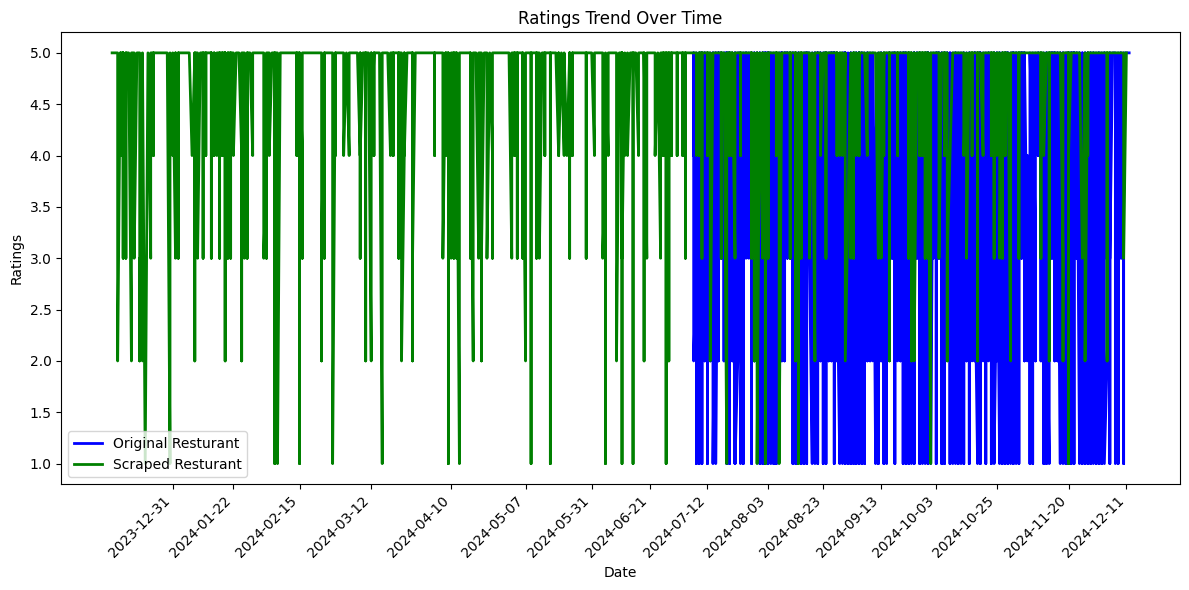

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

current_date = datetime.now().strftime("%B %d %Y")
# print (current_date)

# Function to normalize mixed date formats
def parse_date(date_str):
    if date_str == "today":
        return current_date
    elif "day ago" in date_str:
        return (datetime.now() - timedelta(days=1)).strftime("%B %d %Y")
    elif "days ago" in date_str:
        days = int(date_str.split()[0])
        return (datetime.now() - timedelta(days=days)).strftime("%B %d %Y")
    else:
        return date_str

data_DF = pd.read_csv("data.csv")
SD_df = pd.read_csv("scraped_data.csv")

# Dates
data_Dates = list(data_DF["Dates"])
SD_dates = list(SD_df["Dates"])

# Normalize the dates
data_normalized_dates = [parse_date(date) for date in data_Dates]
SD_normalized_dates = [parse_date(date) for date in SD_dates]
# print(data_normalized_dates)
# print(SD_normalized_dates)

data_normalized_dates = [datetime.strptime(date, "%B %d %Y") for date in data_normalized_dates]
SD_normalized_dates = [datetime.strptime(date, "%B %d %Y") for date in SD_normalized_dates]

# Ratings
data_Ratings = list(data_DF["Ratings"])
SD_ratings = list(SD_df["Ratings"])

# Plotting the line graph
plt.figure(figsize=(12, 6))

plt.plot(data_normalized_dates, data_Ratings, label="Original Resturant", color='blue', linestyle='-', linewidth=2)
plt.plot(SD_normalized_dates, SD_ratings, label="Scraped Resturant", color='green', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Ratings')
plt.title('Ratings Trend Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.xticks(SD_normalized_dates[::100])
plt.legend()
plt.tight_layout()
plt.show()